
Attribute probabilities:
Attr1: 0.512
Attr2: 0.570
Attr3: 0.668
Attr4: 0.056

Predicted attributes: ['Attr3']


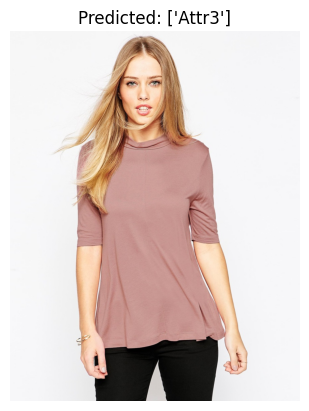

(['Attr3'],
 array([0.5119873 , 0.569653  , 0.6676386 , 0.05626376], dtype=float32))

In [8]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

ATTRIBUTES = ["Attr1", "Attr2", "Attr3", "Attr4"]

#  Same normalization as training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

#  Load model
model = models.resnet50(weights=None)
model.fc = nn.Linear(model.fc.in_features, 4)

model.load_state_dict(torch.load("aimonk_multilabel_resnet50.pth", map_location=DEVICE))
model = model.to(DEVICE)
model.eval()


# Prediction function
def predict(image_path, threshold=0.4, show_image=True):

    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        outputs = model(img_tensor)
        probs = torch.sigmoid(outputs).cpu().numpy()[0]

    #  Print probabilities
    print("\nAttribute probabilities:")
    for i, attr in enumerate(ATTRIBUTES):
        print(f"{attr}: {probs[i]:.3f}")

    #  Apply threshold
    preds = [ATTRIBUTES[i] for i in range(len(probs)) if probs[i] > threshold]

    print("\nPredicted attributes:", preds)

    #  Show image (for demo / submission)
    if show_image:
        plt.imshow(img)
        plt.title(f"Predicted: {preds}")
        plt.axis("off")
        plt.show()

    return preds, probs


#  Test on one image
predict("images/image_10.jpg", threshold=0.60)


Attribute probabilities:
Attr1: 0.651
Attr2: 0.435
Attr3: 0.236
Attr4: 0.058

Predicted attributes: ['Attr1']


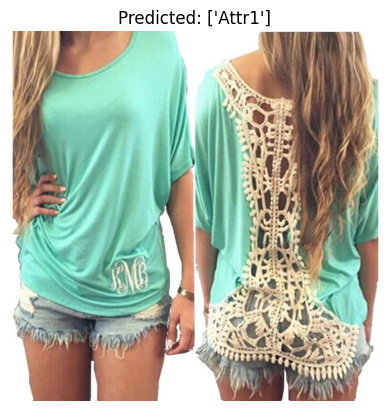


Attribute probabilities:
Attr1: 0.435
Attr2: 0.524
Attr3: 0.229
Attr4: 0.055

Predicted attributes: []


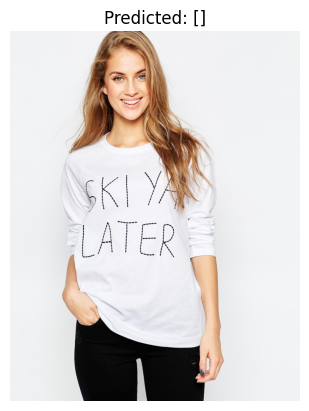


Attribute probabilities:
Attr1: 0.596
Attr2: 0.550
Attr3: 0.441
Attr4: 0.156

Predicted attributes: []


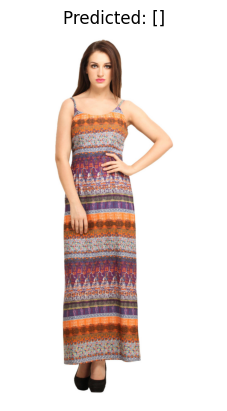

In [9]:
for img in ["image_1.jpg", "image_25.jpg", "image_100.jpg"]:
    predict(f"images/{img}", threshold=0.60)